# Day 3 - Polygons

Data sources:
- [Dutch provinces](https://stacks.stanford.edu/file/druid:st293bj4601/data.zip)
- [Bicycle prognoses](https://www.rijksoverheid.nl/documenten/rapporten/2021/06/29/bijlage-3-achtergrondrapport-2-spoor-en-btm)

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
ima_ov = pd.read_csv("data/ima/ima_2021_ov_per_province.csv")

ima_ov = ima_ov.melt(
    id_vars=["provincie", "vervoerwijze"], 
    value_vars=["2030-L", "2030-H", "2040-L", "2040-H", "2050-L", "2050-H"],
    var_name="year",
    value_name="value"
)

ima_ov["scenario"] = ima_ov["year"].apply(lambda x: x.split("-")[1])
ima_ov["year"] = ima_ov["year"].apply(lambda x: int(x.split("-")[0]))

ima_ov

,provincie,vervoerwijze,year,value,scenario
0,Groningen,Trein,2030,119,L
1,Groningen,BTM,2030,102,L
2,Groningen,Fiets,2030,104,L
3,Friesland,Trein,2030,111,L
4,Friesland,BTM,2030,91,L
...,...,...,...,...,...
211,Noord-Brabant,BTM,2050,115,H
212,Noord-Brabant,Fiets,2050,110,H
213,Limburg,Trein,2050,121,H
214,Limburg,BTM,2050,104,H


In [5]:
mapdf = gpd.read_file("https://stacks.stanford.edu/file/druid:st293bj4601/data.zip")
mapdf = mapdf[mapdf["TYPE_1"] == "Provincie"]
mapdf.sort_values("NAME_1", inplace=True)

(3.1674662470817596, 7.420410788059175, 50.58193702697754, 53.69613914489746)

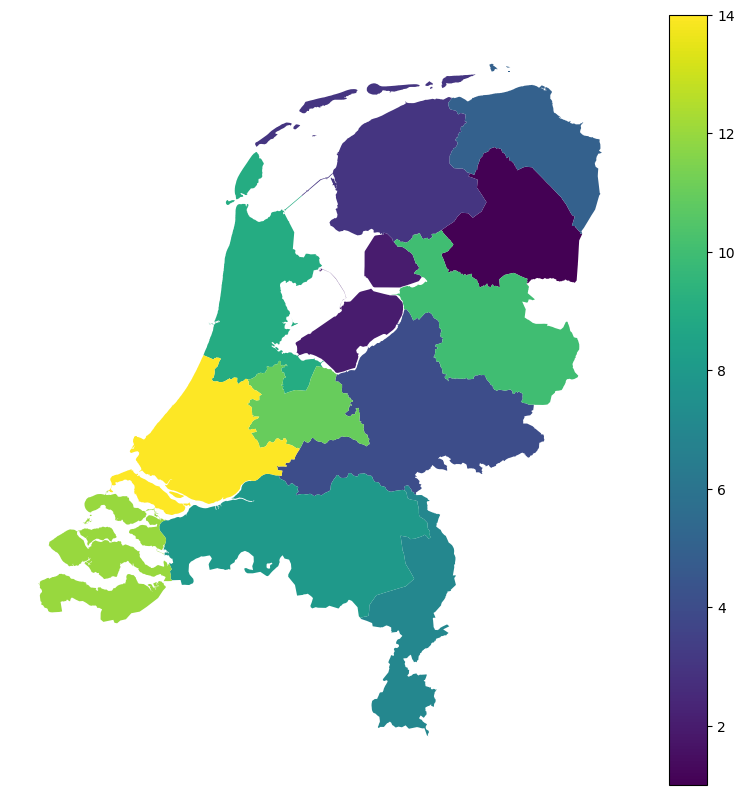

In [44]:
mapdf.plot(column="ID_1", figsize=(10,10), legend=True)
plt.axis('off')

In [30]:
import plotly.express as px

fig = px.choropleth_mapbox(mapdf, geojson=mapdf.geometry, locations=mapdf.index, color='ID_1',
                           color_continuous_scale="temps_r",
                           range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=5, 
                           center = {"lat": 52, "lon": 6},
                           opacity=.9,
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
from bokeh.io import show
from bokeh.models import CustomJS, RadioGroup

LABELS = ["Option 1", "Option 2", "Option 3"]

radio_group = RadioGroup(labels=LABELS, active=0)
radio_group.js_on_click(CustomJS(code="""
    console.log('radio_group: active=' + this.active, this.toString())
"""))

show(radio_group)

# https://stackoverflow.com/questions/34465697/python-bokeh-radio-button-group